<h2 align=center>Analyze Worldwide Box Office Data with Seaborn and Python (Part 1)</h2>
<img src="revenue.png">

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Task 1: Data Loading and Exploration

In [3]:
train=pd.read_csv("/content/drive/MyDrive/Box office dataset/train (1).csv")
test=pd.read_csv("/content/drive/MyDrive/Box office dataset/test (1).csv")

In [4]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

### Task 2: Visualizing the Target Distribution

<ipython-input-5-66ba187f1157>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-5-66ba187f1157>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-5-66ba187f1157>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.c

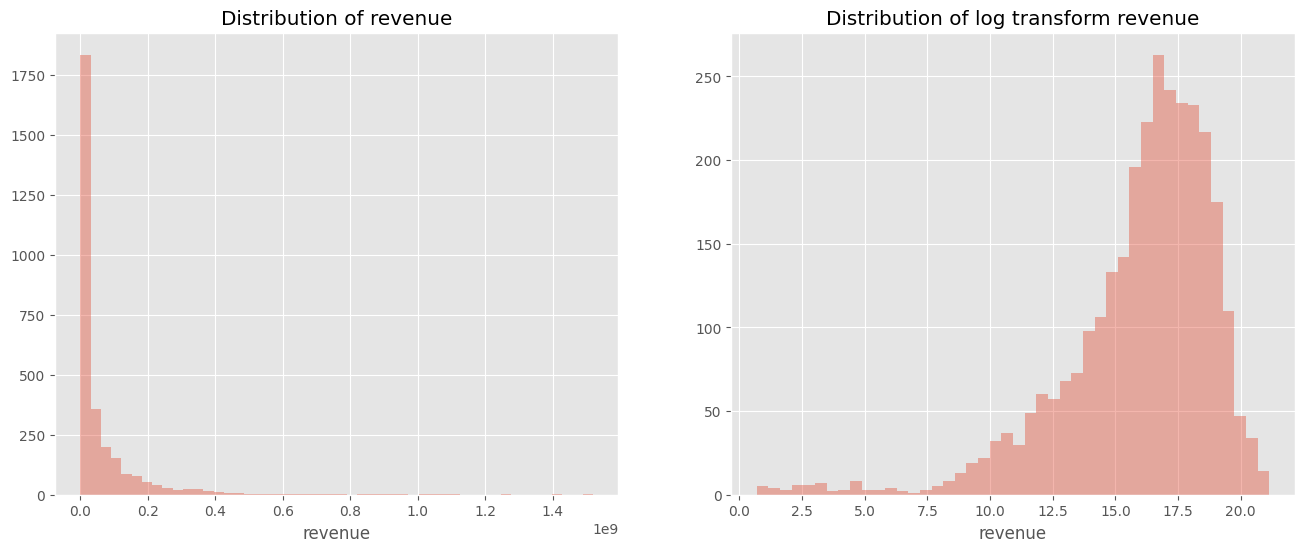

In [5]:
fig ,ax=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(train["revenue"],kde=False);
plt.title("Distribution of revenue");
plt.subplot(1,2,2)
sns.distplot(np.log1p(train["revenue"]),kde=False);
plt.title("Distribution of log transform revenue");
#we want to make the revenue more normally distributed
#so we want to replace the feature revenue with the log revenue

In [6]:
#replace features
#we analyze the target veriable
train['log revenue']=np.log1p(train['revenue'])

### Task 3: Relationship between Film Revenue and Budget

Text(0.5, 1.0, 'log Revenue vs log Budget')

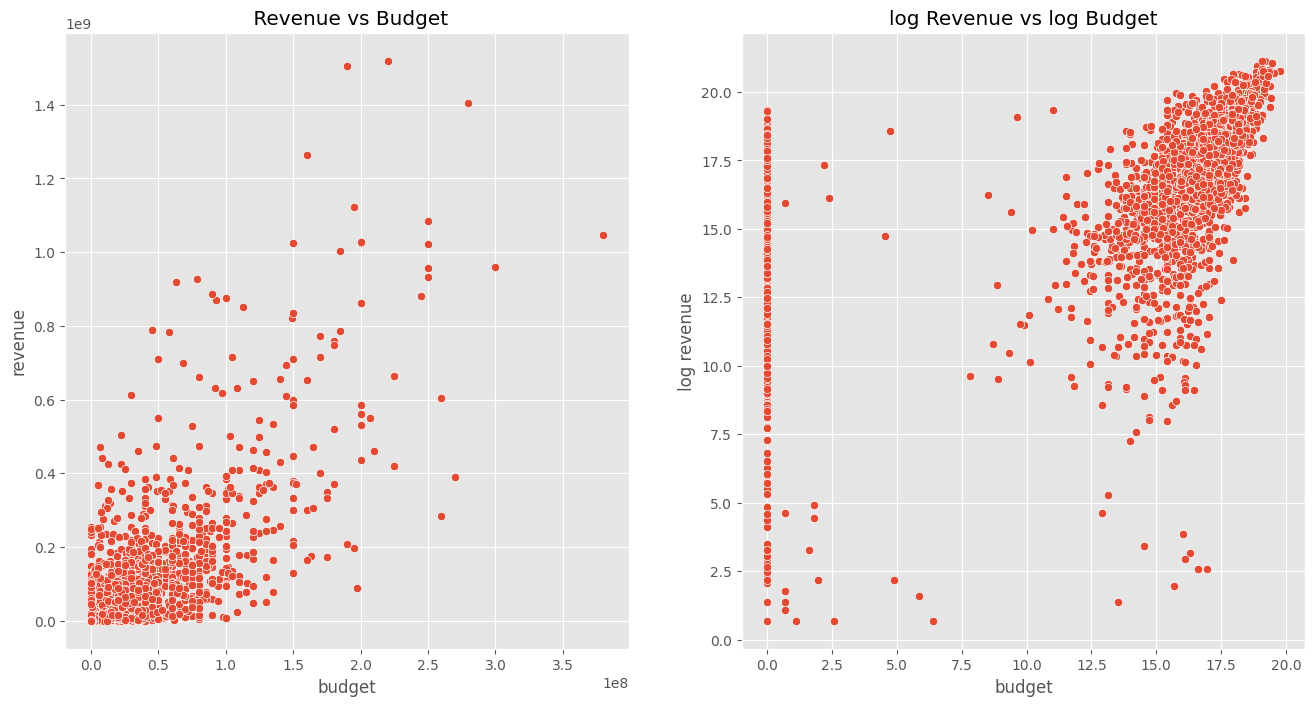

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(data=train, x="budget",y="revenue")
plt.title(" Revenue vs Budget");
plt.subplot(1,2,2)
sns.scatterplot(data=train, x=np.log1p(train["budget"]),y='log revenue')
plt.title("log Revenue vs log Budget")

In [8]:
train['log budget']=np.log1p(train["budget"])
test['log budget']=np.log1p(test["budget"])

### Task 4: Does having an Official Homepage Affect Revenue?

In [9]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/                      4
http://www.thehobbit.com/                              2
http://www.lordoftherings.net/                         2
http://sonyclassics.com/whiplash/                      1
https://www.facebook.com/thefinesthoursmovie           1
http://sonyclassics.com/pariscanwait/                  1
http://www.maxpaynethemovie.com                        1
http://www.sonypictures.com/movies/afewgoodmen/        1
http://www.theasylum.cc/product.php?id=203             1
http://www.miramax.com/movie/the-cider-house-rules/    1
Name: homepage, dtype: int64

In [10]:
train["has_homepage"]=0
train.loc[train["homepage"].isnull()==False,"has_homepage"]=1
test["has_homepage"]=0
test.loc[test["homepage"].isnull()==False,"has_homepage"]=1

Text(0.5, 1.0, 'revenue forfilms with and without homepage')

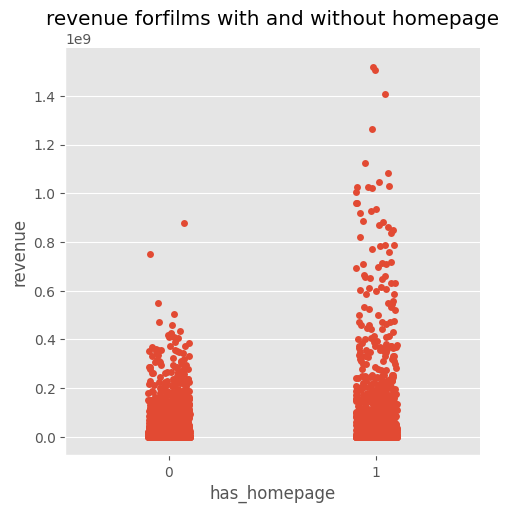

In [11]:
sns.catplot(data=train, x="has_homepage" ,y="revenue")
plt.title('revenue forfilms with and without homepage')
#the films who has page have more revenue than films without page

### Task 5: Distribution of Languages in Film

In [12]:
#we want to look how the language effect on the revenue
language_data=train.loc[train["original_language"].isin(train["original_language"].value_counts().head(10).index)]

Text(0.5, 1.0, 'mean log revenue per language')

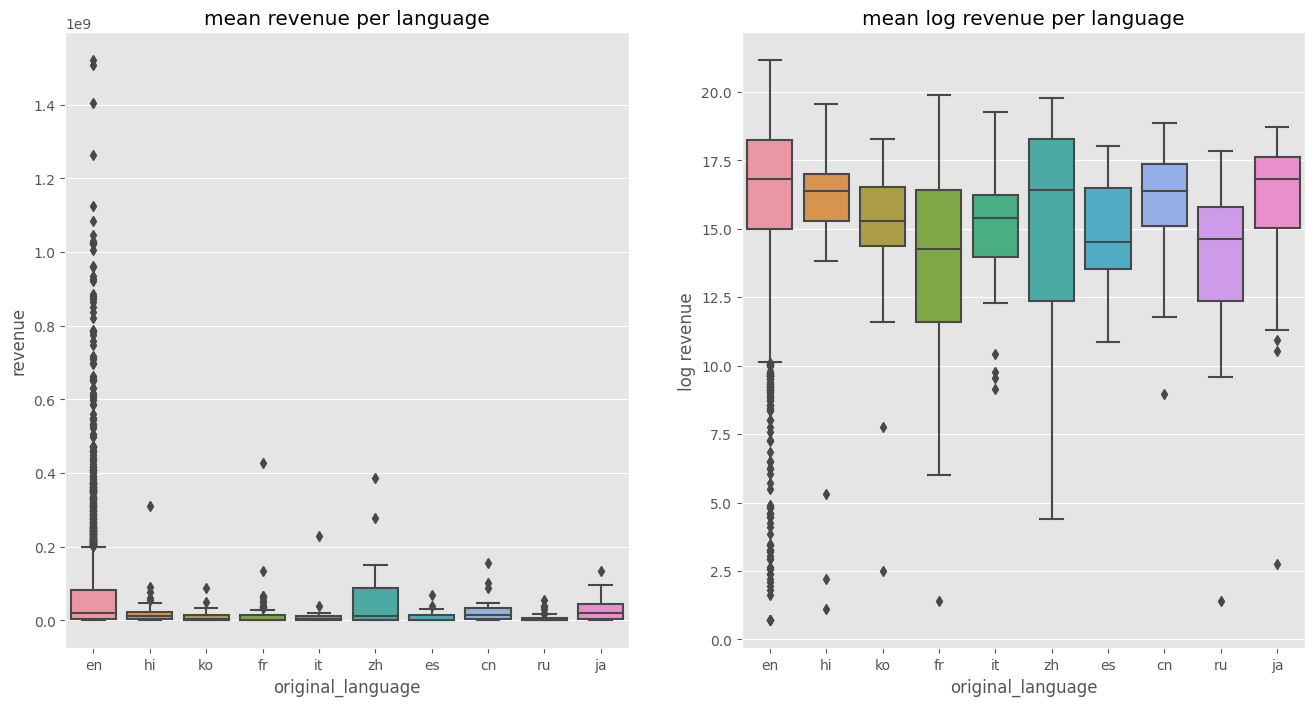

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(data=language_data , x="original_language" , y="revenue")
plt.title("mean revenue per language")
plt.subplot(1,2,2)
sns.boxplot(data=language_data , x="original_language" , y="log revenue")
plt.title("mean log revenue per language")

### Task 6: Frequent Words in Film Titles and Descriptions

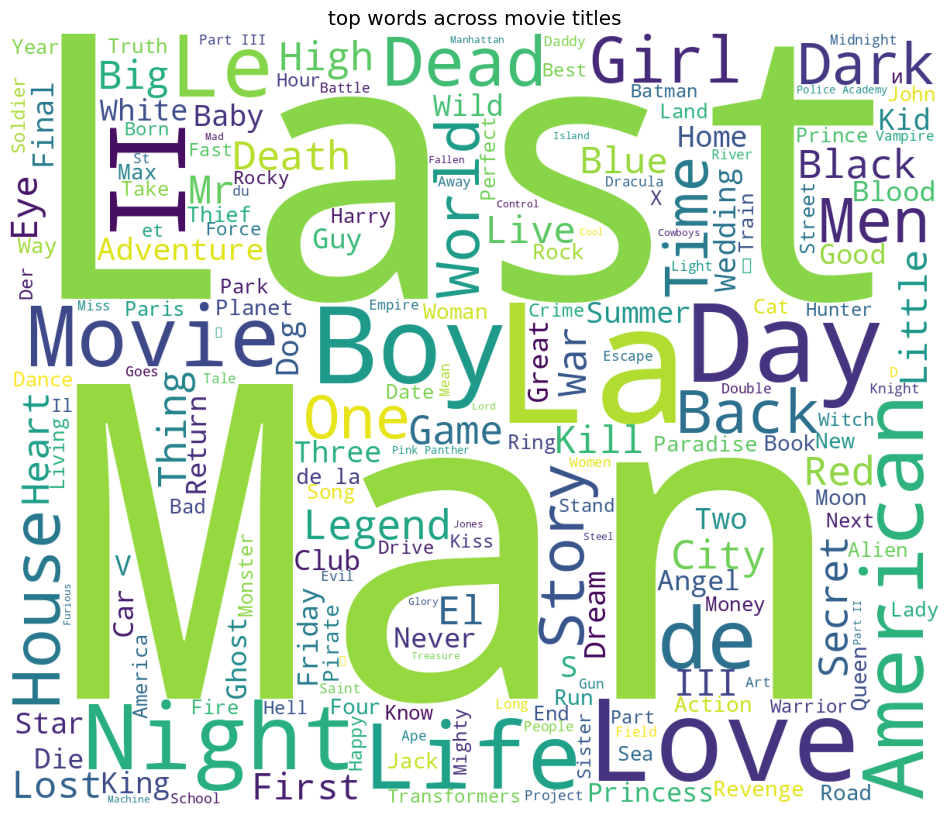

In [14]:

plt.figure(figsize=(12,12))
text=" ".join(train["original_title"].values)
wordcloud = WordCloud(max_font_size=None,
                    background_color="white",
                    width=1200,height=1000).generate(text)
plt.imshow(wordcloud)
plt.title("top words across movie titles")
plt.axis("off")
plt.show()

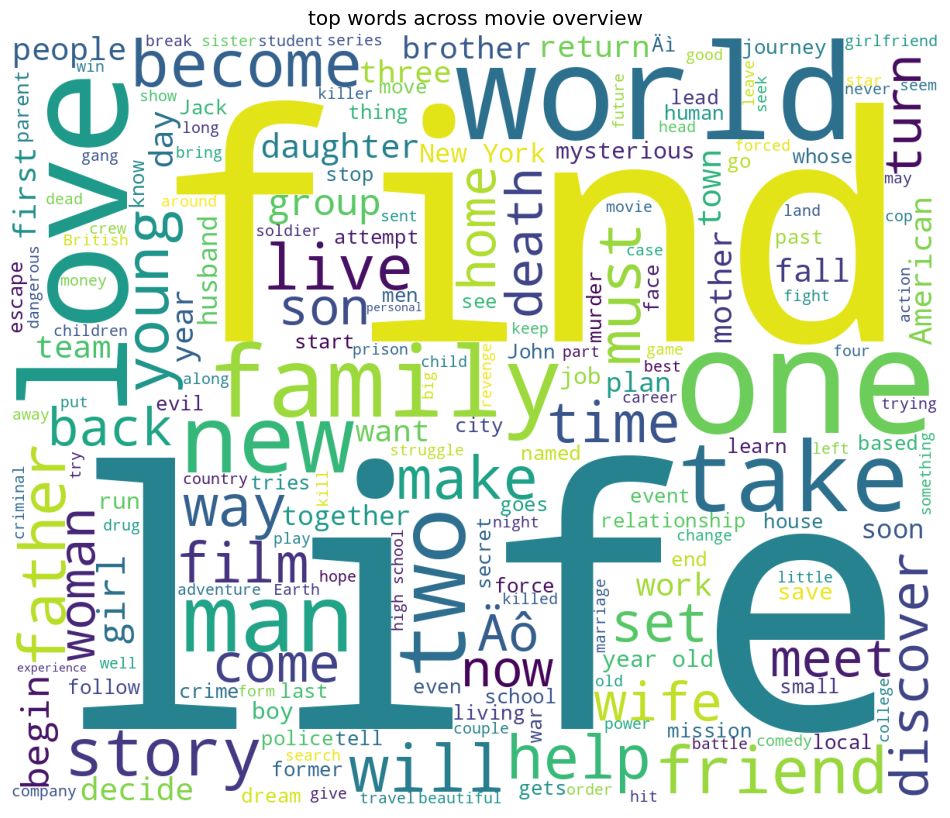

In [15]:
plt.figure(figsize=(12,12))
text=" ".join(train["overview"].fillna(" ").values)
wordcloud = WordCloud(max_font_size=None,
                    background_color="white",
                    width=1200,height=1000).generate(text)
plt.imshow(wordcloud)
plt.title("top words across movie overview")
plt.axis("off")
plt.show()

### Task 7: Do Film Descriptions Impact Revenue?

In [16]:
!pip install -U eli5
import eli5
from sklearn.linear_model import LinearRegression

In [29]:
from IPython.display import display
from eli5 import show_prediction, show_weights
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    min_df=5
)
overview_test=vectorizer.fit_transform(train['overview'].fillna(" "))
linreg=LinearRegression()
linreg.fit(overview_test,train['log revenue'])
show_weights(linreg ,vec=vectorizer , top=20 ,feature_filter =lambda x : x!= '<BIAS>')
#eli5.show_predection(eli5.show_weights(linreg ,vec=vectorizer , top=100 ,feature_filter =lambda x : x!= '<BIAS>'))


In [30]:
eli5.show_weights(linreg, top=20,vec=vectorizer)
